## Python- SQL connection

In [1]:
%pip install sqlalchemy ipython-sql

  Using cached sqlalchemy-2.0.40-cp312-cp312-win_amd64.whl.metadata (9.9 kB)
  Using cached ipython_sql-0.5.0-py3-none-any.whl.metadata (17 kB)
  Using cached prettytable-3.16.0-py3-none-any.whl.metadata (33 kB)
  Using cached sqlparse-0.5.3-py3-none-any.whl.metadata (3.9 kB)
  Using cached ipython_genutils-0.2.0-py2.py3-none-any.whl.metadata (755 bytes)
Using cached sqlalchemy-2.0.40-cp312-cp312-win_amd64.whl (2.1 MB)
Using cached ipython_sql-0.5.0-py3-none-any.whl (20 kB)
Using cached ipython_genutils-0.2.0-py2.py3-none-any.whl (26 kB)
Using cached prettytable-3.16.0-py3-none-any.whl (33 kB)
Using cached sqlparse-0.5.3-py3-none-any.whl (44 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
%pip install mysql-connector-python

   ---------------------------------------- 0.0/16.4 MB ? eta -:--:--
   ---------- ----------------------------- 4.5/16.4 MB 26.9 MB/s eta 0:00:01
   --------------------------------- ------ 13.9/16.4 MB 33.6 MB/s eta 0:00:01
   ---------------------------------------  16.3/16.4 MB 35.3 MB/s eta 0:00:01
   ---------------------------------------- 16.4/16.4 MB 20.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
%pip install PyMySQL

  Using cached PyMySQL-1.1.1-py3-none-any.whl.metadata (4.4 kB)
Using cached PyMySQL-1.1.1-py3-none-any.whl (44 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## Restart the kernel

In [1]:
import pandas as pd

In [2]:
from sqlalchemy import URL,create_engine

In [3]:
conn_str = URL.create(
    drivername="mysql+pymysql",
    username = "root",
    password = "admin123",
    host = "localhost",
    port = 3306,
    database="weekday911"
)

In [4]:
engine = create_engine(conn_str)

## Reading data from mysql database

In [5]:
conn = engine.connect()
# to view all the tables present in weekday911
pd.read_sql("show tables",conn)

,Tables_in_weekday911
0,athletes
1,courses
2,customers
3,dept
4,dept2
5,drinks
6,emp
7,emp2
8,emp3
9,empdata


In [6]:
# to extract customers tables information from weekday911 databse
df = pd.read_sql("select * from customers",conn)
df

,custid,custname,custmob,country
0,1,Raman,23423423,India
1,2,John,2342342,USA
2,3,Thaman,34535345,India
3,4,Doe,12312312,Russia
4,5,Suraj,234234234,USA
5,6,JOHN,132678234,USA


In [7]:
# to extract custname,custmon,country from customers table 
df1 = pd.read_sql("select custname,custmob,country from customers",conn)
df1

,custname,custmob,country
0,Raman,23423423,India
1,John,2342342,USA
2,Thaman,34535345,India
3,Doe,12312312,Russia
4,Suraj,234234234,USA
5,JOHN,132678234,USA


## to write/save the tables to mysql databases

In [14]:
df1

,custname,custmob,country
0,Raman,23423423,India
1,John,2342342,USA
2,Thaman,34535345,India
3,Doe,12312312,Russia
4,Suraj,234234234,USA
5,JOHN,132678234,USA


In [16]:
# to push the data to mysql database
df1.to_sql("cust_data_new",conn,if_exists='replace')

6

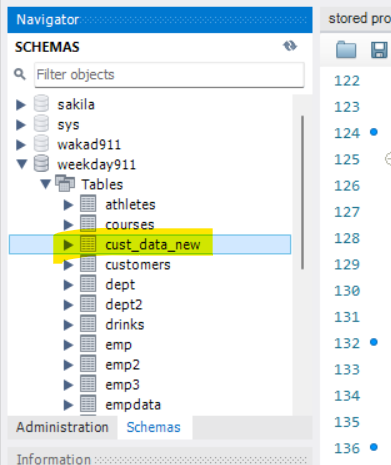

In [17]:
pd.read_sql("show tables",conn)

,Tables_in_weekday911
0,athletes
1,courses
2,cust_data_new
3,customers
4,dept
5,dept2
6,drinks
7,emp
8,emp2
9,emp3
